In [5]:
import warnings
warnings.filterwarnings("ignore")

## for data
import pandas as pd
import numpy as np
import re
from datetime import datetime

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for machine learning
from sklearn import metrics, preprocessing

## for deep learning
from tensorflow.keras import models, layers, utils  #(2.6.0)

In [6]:
# Products  
products_path = r'C:\Users\Usuario\Documents\AI JOBS\Ferretera Central\spanish one\dtf_products.csv'
dtf_products = pd.read_csv(products_path)
dtf_products

,Unnamed: 0,CodArticulo,Nivel1,Nivel2,Nivel3,Nivel4,PrecioCosto,GrupoId,MarcaId,TipoComercializacionId
0,0,10001,5,43,0,0,3958.0000,345.0,26.0,1.0
1,1,10002,5,43,0,0,4125.0000,345.0,26.0,1.0
2,2,1001,9,104,89,0,62.2725,NaN,NaN,1.0
3,3,10011,1,442,96,0,3517.0000,2215.0,26.0,1.0
4,4,10013,1,54,0,0,1269.8600,586.0,53.0,1.0
...,...,...,...,...,...,...,...,...,...,...
9850,9850,9999950,1,0,0,0,5000.0000,1863.0,97.0,1.0
9851,9851,999996,1,0,0,0,1517.7160,1863.0,99.0,1.0
9852,9852,999997,1,0,0,0,303.5432,1863.0,99.0,1.0
9853,9853,999998,1,0,0,0,3289.2400,1863.0,26.0,1.0


In [7]:
# Products

dtf_products = dtf_products.drop('Unnamed: 0', axis=1)

dtf_products = dtf_products[~dtf_products["CodArticulo"].isna()]
#dtf_products["product"] = range(0,len(dtf_products))
#dtf_products.rename(columns= {'Unnamed: 0': 'product'}, inplace=True)

# Convertir la columna 'CodArticu' a numérica y filtrar las filas con valores no numéricos
dtf_products = dtf_products[pd.to_numeric(dtf_products['CodArticulo'], errors='coerce').notna()]

dtf_products

,CodArticulo,Nivel1,Nivel2,Nivel3,Nivel4,PrecioCosto,GrupoId,MarcaId,TipoComercializacionId
0,10001,5,43,0,0,3958.0000,345.0,26.0,1.0
1,10002,5,43,0,0,4125.0000,345.0,26.0,1.0
2,1001,9,104,89,0,62.2725,NaN,NaN,1.0
3,10011,1,442,96,0,3517.0000,2215.0,26.0,1.0
4,10013,1,54,0,0,1269.8600,586.0,53.0,1.0
...,...,...,...,...,...,...,...,...,...
9850,9999950,1,0,0,0,5000.0000,1863.0,97.0,1.0
9851,999996,1,0,0,0,1517.7160,1863.0,99.0,1.0
9852,999997,1,0,0,0,303.5432,1863.0,99.0,1.0
9853,999998,1,0,0,0,3289.2400,1863.0,26.0,1.0


In [8]:
# Usuarios
usuarios_path = r'C:\Users\Usuario\Documents\AI JOBS\Ferretera Central\spanish one\dtf_users.csv'
dtf_usuarios = pd.read_csv(usuarios_path)
dtf_usuarios

,Unnamed: 0,CodCliente,Vendedor,CodigoPostal,CondicionVenta,CodCondIVA
0,0,1,14,51892,1,1
1,1,2,6,57000,3,1
2,2,3,2,16271,1,1
3,3,4,10,5800,3,1
4,4,5,13,5194,1,1
...,...,...,...,...,...,...
3188,3188,100067,9,5805,1,1
3189,3189,100080,9,5847,1,1
3190,3190,100748,3,5800,1,1
3191,3191,100749,3,5800,1,1


In [9]:
# Users
dtf_usuarios = dtf_usuarios.drop('Unnamed: 0', axis=1)
dtf_usuarios = dtf_usuarios[~dtf_usuarios["CodCliente"].isna()]
#dtf_usuarios["user"] = range(0,len(dtf_usuarios))
#dtf_users.rename(columns={'Unnamed: 0': 'user'}, inplace=True)
dtf_usuarios

,CodCliente,Vendedor,CodigoPostal,CondicionVenta,CodCondIVA
0,1,14,51892,1,1
1,2,6,57000,3,1
2,3,2,16271,1,1
3,4,10,5800,3,1
4,5,13,5194,1,1
...,...,...,...,...,...
3188,100067,9,5805,1,1
3189,100080,9,5847,1,1
3190,100748,3,5800,1,1
3191,100749,3,5800,1,1


In [10]:
# extract context
#dtf_context = dtf_users[["user","product","daytime","weekend"]]
#dtf_context.head()

In [11]:
# ConsultaData
consulta_path = r'C:\Users\Usuario\Documents\AI JOBS\Ferretera Central\spanish one\dtf_consulta.csv'
dtf_consulta = pd.read_csv(consulta_path)
dtf_consulta

,Unnamed: 0,CodCliente,CodArticu,Unnamed: 3,timeStamp
0,0,524.0,8004,1,1970-01-01
1,1,1407.0,330200,1,1970-01-01
2,2,1407.0,71007,1,1970-01-01
3,3,22.0,10001,1,2014-07-01
4,4,22.0,1498,1,2014-07-01
...,...,...,...,...,...
2484471,2484471,100748.0,907,1,2023-12-01
2484472,2484472,100748.0,908,1,2023-12-01
2484473,2484473,100748.0,909,1,2023-12-01
2484474,2484474,100748.0,910,1,2023-12-01


In [12]:
dtf_consulta.drop(columns=['Unnamed: 0'], inplace=True)
dtf_consulta.drop(columns=['timeStamp'], inplace=True)

dtf_consulta.rename(columns={'Unnamed: 3':'y'}, inplace=True)
dtf_consulta.rename(columns={'CodArticu':'CodArticulo'}, inplace=True)

# Convertir la columna "CodArticu" a tipo numérico
dtf_consulta['CodArticulo'] = pd.to_numeric(dtf_consulta['CodArticulo'], errors='coerce')

# Eliminar las filas que contienen valores no numéricos en la columna "CodArticu"
dtf_consulta = dtf_consulta.dropna(subset=['CodArticulo'])

dtf_consulta

,CodCliente,CodArticulo,y
0,524.0,8004.0,1
1,1407.0,330200.0,1
2,1407.0,71007.0,1
3,22.0,10001.0,1
4,22.0,1498.0,1
...,...,...,...
2484471,100748.0,907.0,1
2484472,100748.0,908.0,1
2484473,100748.0,909.0,1
2484474,100748.0,910.0,1


In [13]:
dtf_consulta = dtf_consulta.dropna()

dtf_consulta

,CodCliente,CodArticulo,y
0,524.0,8004.0,1
1,1407.0,330200.0,1
2,1407.0,71007.0,1
3,22.0,10001.0,1
4,22.0,1498.0,1
...,...,...,...
2484471,100748.0,907.0,1
2484472,100748.0,908.0,1
2484473,100748.0,909.0,1
2484474,100748.0,910.0,1


In [14]:
# Crear un mapeo único entre CodCliente y userIDs
unique_user_mapping = {cod_cliente: user_id for user_id, cod_cliente in enumerate(dtf_consulta['CodCliente'].unique())}

# Agregar una nueva columna userID al DataFrame dtf_consulta usando el mapeo
dtf_consulta['user'] = dtf_consulta['CodCliente'].map(unique_user_mapping)

# Crear un mapeo único entre CodArticu y productIDs
unique_product_mapping = {cod_articu: product_id for product_id, cod_articu in enumerate(dtf_consulta['CodArticulo'].unique())}

# Agregar una nueva columna product al DataFrame dtf_consulta usando el mapeo
dtf_consulta['product'] = dtf_consulta['CodArticulo'].map(unique_product_mapping)

dtf_consulta

,CodCliente,CodArticulo,y,user,product
0,524.0,8004.0,1,0,0
1,1407.0,330200.0,1,1,1
2,1407.0,71007.0,1,1,2
3,22.0,10001.0,1,2,3
4,22.0,1498.0,1,2,4
...,...,...,...,...,...
2484471,100748.0,907.0,1,406,785
2484472,100748.0,908.0,1,406,187
2484473,100748.0,909.0,1,406,510
2484474,100748.0,910.0,1,406,2177


In [15]:
dtf_consulta.describe()

,CodCliente,CodArticulo,y,user,product
count,2.456408e+06,2.456408e+06,2.456408e+06,2.456408e+06,2.456408e+06
mean,1.243531e+03,1.368194e+06,1.051410e+00,8.968077e+02,2.261201e+03
std,2.866346e+03,1.159798e+07,2.576980e-01,7.154347e+02,2.210504e+03
min,1.000000e+00,2.100000e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,4.550000e+02,1.215500e+04,1.000000e+00,2.490000e+02,4.830000e+02
50%,9.630000e+02,7.883600e+04,1.000000e+00,7.690000e+02,1.345000e+03
75%,1.690000e+03,5.804050e+05,1.000000e+00,1.372000e+03,3.723000e+03
max,1.007500e+05,8.208452e+08,1.400000e+01,3.026000e+03,9.483000e+03


In [16]:
dtf_consulta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2456408 entries, 0 to 2484475
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   CodCliente   float64
 1   CodArticulo  float64
 2   y            int64  
 3   user         int64  
 4   product      int64  
dtypes: float64(2), int64(3)
memory usage: 112.4 MB


In [17]:
# Merge para agregar la columna "user" a dtf_user
#dtf_consulta = dtf_consulta.merge(dtf_users[['CodCliente', 'user']], how='left', on='CodCliente')
dtf_usuarios = dtf_usuarios.merge(dtf_consulta[['CodCliente','user']], how= 'left', on='CodCliente')

dtf_usuarios

,CodCliente,Vendedor,CodigoPostal,CondicionVenta,CodCondIVA,user
0,1,14,51892,1,1,1004.0
1,1,14,51892,1,1,1004.0
2,1,14,51892,1,1,1004.0
3,1,14,51892,1,1,1004.0
4,1,14,51892,1,1,1004.0
...,...,...,...,...,...,...
2456569,100749,3,5800,1,1,600.0
2456570,100750,3,5800,1,1,407.0
2456571,100750,3,5800,1,1,407.0
2456572,100750,3,5800,1,1,407.0


In [18]:
# Lista de columnas
columnas = dtf_usuarios.columns

# Calcular la cantidad de valores NaN en cada columna
valores_nulos_por_columna = dtf_usuarios[columnas].isna().sum()

# Imprimir los resultados
print(valores_nulos_por_columna)

CodCliente          0
Vendedor            0
CodigoPostal        0
CondicionVenta      0
CodCondIVA          0
user              166
dtype: int64


In [19]:
dtf_usuarios = dtf_usuarios.dropna(subset=['user'])

# Calcular la cantidad de valores NaN en cada columna
valores_nulos_por_columna = dtf_usuarios[columnas].isna().sum()

# Imprimir los resultados
print(valores_nulos_por_columna)

CodCliente        0
Vendedor          0
CodigoPostal      0
CondicionVenta    0
CodCondIVA        0
user              0
dtype: int64


In [20]:
dtf_products

,CodArticulo,Nivel1,Nivel2,Nivel3,Nivel4,PrecioCosto,GrupoId,MarcaId,TipoComercializacionId
0,10001,5,43,0,0,3958.0000,345.0,26.0,1.0
1,10002,5,43,0,0,4125.0000,345.0,26.0,1.0
2,1001,9,104,89,0,62.2725,NaN,NaN,1.0
3,10011,1,442,96,0,3517.0000,2215.0,26.0,1.0
4,10013,1,54,0,0,1269.8600,586.0,53.0,1.0
...,...,...,...,...,...,...,...,...,...
9850,9999950,1,0,0,0,5000.0000,1863.0,97.0,1.0
9851,999996,1,0,0,0,1517.7160,1863.0,99.0,1.0
9852,999997,1,0,0,0,303.5432,1863.0,99.0,1.0
9853,999998,1,0,0,0,3289.2400,1863.0,26.0,1.0


In [21]:
# Merge para agregar la columna "product" a dtf_consulta
#dtf_consulta = dtf_consulta.merge(dtf_products[['CodArticulo', 'product']], how='left', on='CodArticulo')
dtf_products = dtf_products.merge(dtf_consulta[['CodArticulo','product']], how= 'left', on= 'CodArticulo')
dtf_products

,CodArticulo,Nivel1,Nivel2,Nivel3,Nivel4,PrecioCosto,GrupoId,MarcaId,TipoComercializacionId,product
0,10001,5,43,0,0,3958.000,345.0,26.0,1.0,3.0
1,10001,5,43,0,0,3958.000,345.0,26.0,1.0,3.0
2,10001,5,43,0,0,3958.000,345.0,26.0,1.0,3.0
3,10001,5,43,0,0,3958.000,345.0,26.0,1.0,3.0
4,10001,5,43,0,0,3958.000,345.0,26.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2456763,999998,1,0,0,0,3289.240,1863.0,26.0,1.0,4840.0
2456764,999998,1,0,0,0,3289.240,1863.0,26.0,1.0,4840.0
2456765,999998,1,0,0,0,3289.240,1863.0,26.0,1.0,4840.0
2456766,999998,1,0,0,0,3289.240,1863.0,26.0,1.0,4840.0


In [22]:
# Lista de columnas
columns = dtf_products.columns

# Calcular la cantidad de valores NaN en cada columna
valores_nulos_por_column = dtf_products[columns].isna().sum()

# Imprimir los resultados
print(valores_nulos_por_column)

CodArticulo                    0
Nivel1                         0
Nivel2                         0
Nivel3                         0
Nivel4                         0
PrecioCosto                    0
GrupoId                    55289
MarcaId                   296424
TipoComercializacionId       182
product                      376
dtype: int64


In [23]:
dtf_products["GrupoId"] = dtf_products["GrupoId"].fillna(0.0)
dtf_products["MarcaId"] = dtf_products["MarcaId"].fillna(0.0)
dtf_products["TipoComercializacionId"] = dtf_products["TipoComercializacionId"].fillna(1.0)

dtf_products = dtf_products.dropna(subset=['product'])

# Calcular la cantidad de valores NaN en cada columna
valores_nulos_por_columna = dtf_usuarios[columnas].isna().sum()

# Imprimir los resultados
print(valores_nulos_por_columna)

CodCliente        0
Vendedor          0
CodigoPostal      0
CondicionVenta    0
CodCondIVA        0
user              0
dtype: int64


In [24]:
dtf_users = dtf_consulta[["user","product","y"]]
dtf_users.head()

,user,product,y
0,0,0,1
1,1,1,1
2,1,2,1
3,2,3,1
4,2,4,1


In [25]:
dtf_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2456408 entries, 0 to 2484475
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   user     int64
 1   product  int64
 2   y        int64
dtypes: int64(3)
memory usage: 75.0 MB


ahora voy a intentar ponerle id a consulta y mergearselo a producto y item

In [26]:
# extract context
#dtf_context = dtf_products[["CodArticu","ArticuloPatron"]]
#dtf_context.head()

In [27]:
# select only useful columns
dtf_products = dtf_products[["CodArticulo","Nivel1","Nivel2","Nivel3","Nivel4","PrecioCosto","GrupoId","MarcaId","TipoComercializacionId","product"]].set_index("product")
dtf_products.head()

,CodArticulo,Nivel1,Nivel2,Nivel3,Nivel4,PrecioCosto,GrupoId,MarcaId,TipoComercializacionId
product,,,,,,,,,
3.0,10001,5,43,0,0,3958.0,345.0,26.0,1.0
3.0,10001,5,43,0,0,3958.0,345.0,26.0,1.0
3.0,10001,5,43,0,0,3958.0,345.0,26.0,1.0
3.0,10001,5,43,0,0,3958.0,345.0,26.0,1.0
3.0,10001,5,43,0,0,3958.0,345.0,26.0,1.0


In [28]:
# Lista de columnas que quieres convertir a numérico
columnas_numericas = ["Nivel1","Nivel2","Nivel3","Nivel4","PrecioCosto","GrupoId","MarcaId","TipoComercializacionId"]

# Convertir las columnas a numérico
dtf_products[columnas_numericas] = dtf_products[columnas_numericas].apply(pd.to_numeric, errors='coerce')

dtf_products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2456392 entries, 3.0 to 6019.0
Data columns (total 9 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   CodArticulo             int64  
 1   Nivel1                  int64  
 2   Nivel2                  int64  
 3   Nivel3                  int64  
 4   Nivel4                  int64  
 5   PrecioCosto             float64
 6   GrupoId                 float64
 7   MarcaId                 float64
 8   TipoComercializacionId  float64
dtypes: float64(4), int64(5)
memory usage: 187.4 MB


# 1 - Data Analysis

Con respecto a los productos, el siguiente paso es crear la matriz Productos-Características :

In [29]:
#tags = [i.split(".") for i in dtf_products["ArticuloPatron"].unique()]
#columns = list(set([i for lst in tags for i in lst]))

# Eliminar espacios en blanco alrededor de los nombres de las columnas
#columns = [col.strip() for col in columns]

#print(columns)

In [30]:
#for col in columns:
#    dtf_products[col] = dtf_products["ArticuloPatron"].apply(lambda x: 1 if col in x else 0)
#dtf_products.head()

La matriz es escasa ya que la mayoría de los productos no tienen todas las características. Vamos a visualizarlo para entender mejor la situación.

In [31]:
tmp = dtf_users.copy()
dtf_users = tmp.pivot_table(index="user", columns="product", values="y")
missing_cols = list(set(dtf_products.index) - set(dtf_users.columns))
for col in missing_cols:
    dtf_users[col] = np.nan
dtf_users = dtf_users[sorted(dtf_users.columns)]
dtf_users

product,0,1,2,3,4,5,6,7,8,9,...,9474,9475,9476,9477,9478,9479,9480,9481,9482,9483
user,,,,,,,,,,,,,,,,,,,,,
0,1.235294,NaN,NaN,NaN,1.100000,1.0,1.125,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.066667,1.0,1.088235,NaN,1.333333,1.0,1.000,NaN,1.0,1.125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,1.0,1.000000,1.0,1.000,1.0,1.0,1.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.000000,1.0,1.000000,NaN,1.000,1.0,1.0,1.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.000000,NaN,NaN,NaN,1.000000,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
dtf_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3027 entries, 0 to 3026
Columns: 9484 entries, 0 to 9483
dtypes: float64(9484)
memory usage: 219.0 MB


In [33]:
# Convertir los valores 0.0 en NaN
#dtf_users = dtf_users.replace(0.0, np.nan)

# 2 - Preprocessing
* Scaling
* Partitioning

El último paso antes de profundizar en los modelos es el Preprocesamiento . Dado que nos ocuparemos de las redes neuronales, siempre es una buena práctica escalar los datos.

### Scaling

In [34]:
dtf_users = pd.DataFrame(preprocessing.MinMaxScaler(feature_range=(0.5,1)).fit_transform(dtf_users.values), 
                         columns=dtf_users.columns, index=dtf_users.index)
dtf_users

product,0,1,2,3,4,5,6,7,8,9,...,9474,9475,9476,9477,9478,9479,9480,9481,9482,9483
user,,,,,,,,,,,,,,,,,,,,,
0,0.558824,NaN,NaN,NaN,0.550000,0.5,0.53125,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.516667,0.5,0.544118,NaN,0.666667,0.5,0.50000,NaN,0.5,0.5625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,0.5,0.500000,0.5,0.50000,0.5,0.5,0.5000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,0.500000,0.5,0.500000,NaN,0.50000,0.5,0.5,0.5000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.500000,NaN,NaN,NaN,0.500000,0.5,NaN,NaN,0.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Partitioning

Finalmente, dividiremos los datos en conjuntos de entrenamiento y prueba . Voy a dividir el conjunto de datos verticalmente, de modo que todos los usuarios estén tanto en entrenamiento como en prueba, mientras que el 80 % de los productos se reservan para entrenamiento y el 20 % para prueba. Me gusta esto:

In [35]:
split = int(0.8*dtf_users.shape[1])
split

7587

In [36]:
# Train
dtf_train = dtf_users.loc[:, :split-1]
print("non-null data:", dtf_train[dtf_train>0].count().sum())
dtf_train

non-null data: 989834


product,0,1,2,3,4,5,6,7,8,9,...,7577,7578,7579,7580,7581,7582,7583,7584,7585,7586
user,,,,,,,,,,,,,,,,,,,,,
0,0.558824,NaN,NaN,NaN,0.550000,0.5,0.53125,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.516667,0.5,0.544118,NaN,0.666667,0.5,0.50000,NaN,0.5,0.5625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,0.5,0.500000,0.5,0.50000,0.5,0.5,0.5000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,0.500000,0.5,0.500000,NaN,0.50000,0.5,0.5,0.5000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.500000,NaN,NaN,NaN,0.500000,0.5,NaN,NaN,0.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Test
dtf_test = dtf_users.loc[:, split:]
print("non-null data:", dtf_test[dtf_test>0].count().sum())
dtf_test

non-null data: 43338


product,7587,7588,7589,7590,7591,7592,7593,7594,7595,7596,...,9474,9475,9476,9477,9478,9479,9480,9481,9482,9483
user,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
'''
Plot loss and metrics of keras training.
'''
def utils_plot_keras_training(training):
    metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))
    
    ## training
    ax[0].set(title="Training")
    ax11 = ax[0].twinx()
    ax[0].plot(training.history['loss'], color='black')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss', color='black')
    for metric in metrics:
        ax11.plot(training.history[metric], label=metric)
    ax11.set_ylabel("Score", color='steelblue')
    ax11.legend()
    
    ## validation
    ax[1].set(title="Validation")
    ax22 = ax[1].twinx()
    ax[1].plot(training.history['val_loss'], color='black')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss', color='black')
    for metric in metrics:
        ax22.plot(training.history['val_'+metric], label=metric)
    ax22.set_ylabel("Score", color="steelblue")
    plt.show()

In [39]:
# Evaluate
def mean_reciprocal_rank(y_test, predicted):
    score = []
    for product in y_test:
        mrr = 1 / (list(predicted).index(product) + 1) if product in predicted else 0
        score.append(mrr)
    return np.mean(score)

# 6 - Hybrid Model

* Variable de destino : las calificaciones pueden ser explícitas (es decir, el usuario deja comentarios) o implícitas (es decir, asumir comentarios positivos si el usuario ve la película completa), de todos modos, son necesarios.
* Características del producto : etiquetas y descripciones de los elementos (es decir, géneros de películas), que se utilizan principalmente en los métodos basados ​​en el contenido.
* Perfil de usuario : la información descriptiva sobre los usuarios puede ser demográfica (es decir, sexo y edad) o conductual (es decir, preferencias, tiempo promedio en pantalla, tiempo de uso más frecuente), que se utiliza principalmente para recomendaciones basadas en conocimientos.
* Contexto : información adicional sobre la situación en torno a la calificación (es decir, cuándo, dónde, historial de búsqueda), que a menudo también se incluye en las recomendaciones basadas en el conocimiento.

In [40]:
  # Extra data
features = dtf_products.drop(['CodArticulo','Nivel1', 'Nivel2', 'Nivel3', 'Nivel4', 'PrecioCosto',  'TipoComercializacionId'], axis=1).columns
print(features)

#context = dtf_context.drop(["user","product"], axis=1).columns
#print(context)

Index(['GrupoId', 'MarcaId'], dtype='object')


In [41]:
# Convertir las columnas a tipo float
dtf_products[features] = dtf_products[features].astype('float32')

# Imprimir el nuevo tipo de datos
print(dtf_products.dtypes)

CodArticulo                 int64
Nivel1                      int64
Nivel2                      int64
Nivel3                      int64
Nivel4                      int64
PrecioCosto               float64
GrupoId                   float32
MarcaId                   float32
TipoComercializacionId    float64
dtype: object


In [42]:
train = dtf_train.stack(dropna=True).reset_index().rename(columns={0:"y"})
## add features
train = train.merge(dtf_products[features], how="left", left_on="product", right_index=True)
## add context
#train = train.merge(dtf_context, how="left")
train

,user,product,y
0,0,0,0.558824
1,0,4,0.550000
2,0,5,0.500000
3,0,6,0.531250
4,0,14,0.500000
...,...,...,...
989829,3026,7261,0.500000
989830,3026,7303,0.500000
989831,3026,7304,0.500000
989832,3026,7305,0.500000


In [44]:
## add features
train = train.merge(dtf_products[features], how="left", left_on="product", right_index=True)
#merged_train = pd.merge(train, dtf_products[features], left_on=['product'], right_on=['product'], how='inner')

## add context
#train = train.merge(dtf_context, how="left")

merged_train

MemoryError: Unable to allocate 6.88 GiB for an array with shape (924022432, 1) and data type float64

In [ ]:
train["user"] = train["user"].astype(int)
train["product"] = train["product"].astype(int)

In [ ]:
test = dtf_test.stack(dropna=True).reset_index().rename(columns={0:"y"})

## add features
test = test.merge(dtf_products[features], how="left", left_on="product", right_index=True)

## add context
#train = train.merge(dtf_context, how="left")

test

,user,product,y,Nivel1,Nivel2,Nivel3,Nivel4,PrecioCosto,GrupoId,MarcaId,TipoComercializacionId
0,0.0,7980.0,0.5,1.0,102.0,109.0,0.0,297.8595,1261.0,34.0,1.0
1,0.0,8008.0,0.5,1.0,102.0,109.0,0.0,667.7645,1261.0,34.0,1.0
2,0.0,8009.0,0.5,1.0,102.0,109.0,0.0,1020.4645,1261.0,34.0,1.0
3,0.0,8011.0,0.5,1.0,102.0,109.0,0.0,1714.0362,1261.0,34.0,1.0
4,0.0,8025.0,0.5,1.0,102.0,109.0,0.0,1153.2669,1261.0,34.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
168379,3190.0,9575.0,0.5,1.0,82.0,178.0,0.0,0.5200,2627.0,116.0,1.0
168380,3190.0,9576.0,0.5,1.0,140.0,30.0,0.0,1791.2600,1428.0,14.0,1.0
168381,3190.0,9578.0,0.5,1.0,140.0,30.0,0.0,2017.5200,1428.0,14.0,1.0
168382,3190.0,9618.0,0.5,1.0,140.0,30.0,0.0,25091.6100,1428.0,14.0,1.0


In [ ]:
# Lista de columnas
columns = test.columns

# Calcular la cantidad de valores NaN en cada columna
valores_nulos_por_col= test[columns].isna().sum()

# Imprimir los resultados
print(valores_nulos_por_col)

user                      0
product                   0
y                         0
Nivel1                    0
Nivel2                    0
Nivel3                    0
Nivel4                    0
PrecioCosto               0
GrupoId                   0
MarcaId                   0
TipoComercializacionId    0
dtype: int64


Ahora tenemos todos los ingredientes para construir un modelo híbrido consciente del contexto . La flexibilidad de las redes neuronales nos permite agregar lo que queramos, así que tomaré la estructura de red de filtrado colaborativo neuronal e incluiré tantos módulos como sea posible.

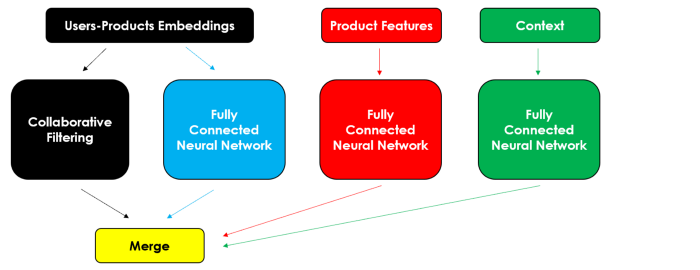

In [ ]:
embeddings_size = 50
usr, prd = dtf_users.shape[0], dtf_users.shape[1]
feat = len(features)
#ctx = len(context)

########################################## COLLABORATIVE FILTERING ###################################################
# Input layer
xusers_in = layers.Input(name="xusers_in", shape=(1,))
xproducts_in = layers.Input(name="xproducts_in", shape=(1,))

# A) Matrix Factorization
## embeddings and reshape
cf_xusers_emb = layers.Embedding(name="cf_xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
cf_xusers = layers.Reshape(name='cf_xusers', target_shape=(embeddings_size,))(cf_xusers_emb)
## embeddings and reshape
cf_xproducts_emb = layers.Embedding(name="cf_xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
cf_xproducts = layers.Reshape(name='cf_xproducts', target_shape=(embeddings_size,))(cf_xproducts_emb)
## product
cf_xx = layers.Dot(name='cf_xx', normalize=True, axes=1)([cf_xusers, cf_xproducts])

# B) Neural Network
## embeddings and reshape
nn_xusers_emb = layers.Embedding(name="nn_xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
nn_xusers = layers.Reshape(name='nn_xusers', target_shape=(embeddings_size,))(nn_xusers_emb)
## embeddings and reshape
nn_xproducts_emb = layers.Embedding(name="nn_xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
nn_xproducts = layers.Reshape(name='nn_xproducts', target_shape=(embeddings_size,))(nn_xproducts_emb)
## concat and dense
nn_xx = layers.Concatenate()([nn_xusers, nn_xproducts])
nn_xx = layers.Dense(name="nn_xx", units=int(embeddings_size/2), activation='relu')(nn_xx)

########################################## CONTENT BASED ###################################################
# Product Features
features_in = layers.Input(name="features_in", shape=(feat,))
features_x = layers.Dense(name="features_x", units=feat, activation='relu')(features_in)

########################################## KNOWLEDGE BASED #################################################
# Context
#contexts_in = layers.Input(name="contexts_in", shape=(ctx,))
#context_x = layers.Dense(name="context_x", units=ctx, activation='relu')(contexts_in)

########################################## OUTPUT ###################################################
# Merge all
y_out = layers.Concatenate()([cf_xx, nn_xx, features_x])
y_out = layers.Dense(name="y_out", units=1, activation='linear')(y_out)

# Compile
model = models.Model(inputs=[xusers_in,xproducts_in, features_in], outputs=y_out, name="Hybrid_Model")
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_percentage_error'])
model.summary()

Model: "Hybrid_Model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 xusers_in (InputLayer)      [(None, 1)]                  0         []                            
                                                                                                  
 xproducts_in (InputLayer)   [(None, 1)]                  0         []                            
                                                                                                  
 nn_xusers_emb (Embedding)   (None, 1, 50)                147400    ['xusers_in[0][0]']           
                                                                                                  
 nn_xproducts_emb (Embeddin  (None, 1, 50)                492750    ['xproducts_in[0][0]']        
 g)                                                                                    

In [ ]:
#utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# train
training = model.fit(x=[train["user"], train["product"], train[features]], y=train["y"], 
                     epochs=2, batch_size=128, shuffle=True, verbose=0, validation_split=0.03)

InvalidArgumentError: Graph execution error:

Detected at node Hybrid_Model/nn_xusers_emb/embedding_lookup defined at (most recent call last):
  File "c:\Users\Usuario\anaconda3\envs\new_env\lib\runpy.py", line 196, in _run_module_as_main

  File "c:\Users\Usuario\anaconda3\envs\new_env\lib\runpy.py", line 86, in _run_code

  File "C:\Users\Usuario\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\Usuario\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1053, in launch_instance

  File "C:\Users\Usuario\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 737, in start

  File "C:\Users\Usuario\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "c:\Users\Usuario\anaconda3\envs\new_env\lib\asyncio\base_events.py", line 603, in run_forever

  File "c:\Users\Usuario\anaconda3\envs\new_env\lib\asyncio\base_events.py", line 1909, in _run_once

  File "c:\Users\Usuario\anaconda3\envs\new_env\lib\asyncio\events.py", line 80, in _run

  File "C:\Users\Usuario\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 524, in dispatch_queue

  File "C:\Users\Usuario\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 513, in process_one

  File "C:\Users\Usuario\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 418, in dispatch_shell

  File "C:\Users\Usuario\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 758, in execute_request

  File "C:\Users\Usuario\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 426, in do_execute

  File "C:\Users\Usuario\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\Usuario\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3046, in run_cell

  File "C:\Users\Usuario\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3101, in _run_cell

  File "C:\Users\Usuario\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\Usuario\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3306, in run_cell_async

  File "C:\Users\Usuario\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3488, in run_ast_nodes

  File "C:\Users\Usuario\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3548, in run_code

  File "C:\Users\Usuario\AppData\Local\Temp\ipykernel_4284\2364027185.py", line 2, in <module>

  File "c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\keras\src\engine\training.py", line 1832, in fit

  File "c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\keras\src\engine\training.py", line 2272, in evaluate

  File "c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\keras\src\engine\training.py", line 4079, in run_step

  File "c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\keras\src\engine\training.py", line 2042, in test_function

  File "c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\keras\src\engine\training.py", line 2025, in step_function

  File "c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\keras\src\engine\training.py", line 2013, in run_step

  File "c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\keras\src\engine\training.py", line 1893, in test_step

  File "c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\keras\src\engine\training.py", line 589, in __call__

  File "c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\Usuario\anaconda3\envs\new_env\lib\site-packages\keras\src\layers\core\embedding.py", line 272, in call

indices[61,0] = 2952 is not in [0, 2948)
	 [[{{node Hybrid_Model/nn_xusers_emb/embedding_lookup}}]] [Op:__inference_test_function_27387]

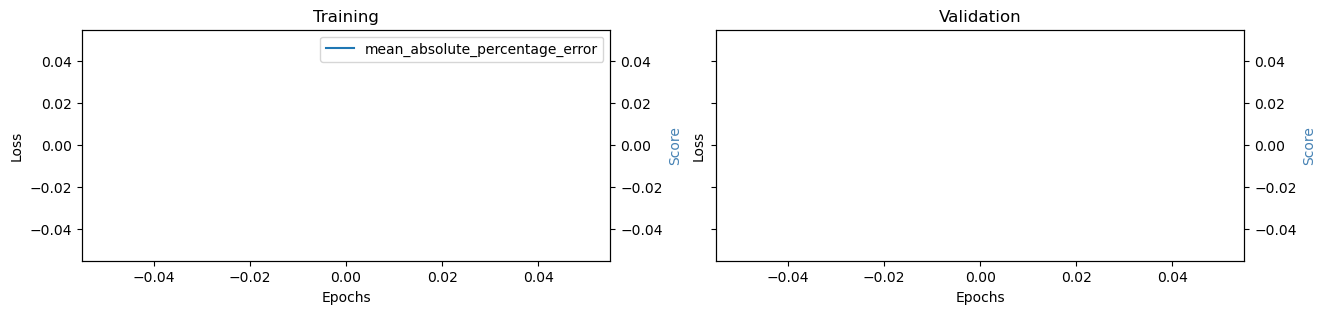

In [ ]:
model = training.model
utils_plot_keras_training(training)

In [ ]:
# test
test["yhat"] = model.predict([test["user"], test["product"], test[features]])
test

2426/2426 [==============================] - 5s 2ms/step


,user,product,y,Nivel1,Nivel2,Nivel3,Nivel4,PrecioCosto,GrupoId,MarcaId,TipoComercializacionId,yhat
0,0,10358,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,10359,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,10440,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,10462,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,10527,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
77621,3027,12119,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77622,3027,12132,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77623,3027,12141,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77624,3027,12188,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# overall
y_test = test["y"]
predicted = test["yhat"]

print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", str(round(np.mean(np.abs((y_test-predicted)/predicted)), 2))+"%")

ValueError: Input contains NaN.

In [ ]:
# single case
i = 1
print("--- user", i, "---")

top = 45
y_test = test[test["user"]==i].sort_values("y", ascending=False)["product"].values[:top]
print("y_test:", y_test)

predicted = test[test["user"]==i].sort_values("yhat", ascending=False)["product"].values[:top]
print("predicted:", predicted)

true_positive = len(list(set(y_test) & set(predicted)))
print("true positive:", true_positive, "("+str(round(true_positive/top*100,1))+"%)")
print("accuracy:", str(round(metrics.accuracy_score(y_test,predicted)*100,1))+"%")
print("mrr:", round(mean_reciprocal_rank(y_test, predicted),2))

--- user 1 ---
y_test: [8004 7918 7944 8498 7995 7992 8013 8007 8497 8275 8267 8010 7911 7889
 8008 8307 8269 8000 8266]
predicted: [8275 8266 8269 8013 7918 8000 8007 8004 7995 8010 7911 8008 8307 8497
 8498 7992 7944 8267 7889]
true positive: 19 (42.2%)
accuracy: 0.0%
mrr: 0.19
